### INFO-6105 Final Project
#### Team Members:
##### Amrita Dubey - 002760658
##### Sachi Kothari - 002925276

#### Sentiment Analysis
<font>Sentiment analysis, is a process of using natural language processing and machine learning techniques to identify, extract, and analyze subjective information from text data, such as reviews, social media posts, and news articles. The goal of sentiment analysis is to understand the attitudes, opinions, and emotions expressed in the text data.</font>

<font>sentiment analysis enables businesses to get valuable insights into the attitudes and opinions of customers or the general public towards a particular product, service, or topic. 
It can help businesses and organizations make informed decisions, improve customer satisfaction, and enhance their overall reputation.

In summary, sentiment analysis is a powerful tool for analyzing large volumes of text data to extract insights about the attitudes and opinions expressed in the text. It can be used in a variety of applications, from product reviews and customer feedback analysis to social media monitoring and market research.</font>

#### Process Involved
<font>The sentiment analysis process typically involves several steps, including data collection, data preprocessing, feature extraction, and classification. Data collection involves obtaining the text data from various sources, such as websites, social media platforms, or customer feedback forms. Data preprocessing involves cleaning and formatting the data to remove noise, irrelevant information, and standardize the format.

Feature extraction involves identifying the most important features or attributes that are likely to influence the sentiment expressed in the text data. For example, in the context of Amazon reviews for cell phones, features such as battery life, camera quality, touch screen, processor and design may be relevant in determining the sentiment expressed in the reviews.

Classification involves using machine learning algorithms, such as Naïve Bayes, KNN, Descision tree, Support Vector Machines, or Recurrent Neural Networks, to classify the text data into different sentiment categories, such as positive, negative, or neutral.
</font>

#### Criteria for sentiment analysis

<font>
    <ul><li><strong>Domain-specificity:</strong> The sentiment analysis algorithm should be tailored to the specific domain or industry of interest, such as cell phones, movies, or restaurants. This ensures that the algorithm can effectively capture the nuances of language and sentiment specific to the domain.</li> </ul>
     <ul><li><strong>Contextual understanding:</strong> The sentiment analysis algorithm should be able to understand the context in which the text data is presented, such as sarcasm, irony, or humor.</li> </ul>
     <ul><li><strong> Scalability:</strong>The sentiment analysis algorithm should be able to handle large volumes of text data efficiently and effectively, without sacrificing accuracy or speed.</li> </ul>
    
Overall, the criteria for sentiment analysis depend on the specific application and industry, as well as the goals and objectives of the analysis. However, the factors listed above are generally considered to be important considerations for evaluating the effectiveness and reliability of sentiment analysis algorithms.
</font>

<font><strong>In this notebook we will focus on how we can do sentiment analysis using Naive Bay's and KNN algorithm</strong></font>

#### Importing the important libraries

In [1]:
import gzip
import shutil
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import TfidfVectorizer
import contractions
import re
import string
import time


# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sachikothari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sachikothari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sachikothari/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Getting metadata info
METADATA_PATH = './meta_Cell_Phones_and_Accessories.json'
phonemetadata = []

with open(METADATA_PATH, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))
df_meta=pd.DataFrame(phonemetadata)

In [3]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      590071 non-null  object
 1   tech1         590071 non-null  object
 2   description   590071 non-null  object
 3   fit           590071 non-null  object
 4   title         590071 non-null  object
 5   also_buy      590071 non-null  object
 6   image         590071 non-null  object
 7   tech2         590071 non-null  object
 8   brand         590071 non-null  object
 9   feature       590071 non-null  object
 10  rank          590071 non-null  object
 11  also_view     590071 non-null  object
 12  details       590071 non-null  object
 13  main_cat      590071 non-null  object
 14  similar_item  590071 non-null  object
 15  date          590071 non-null  object
 16  price         590071 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

In [4]:
#Reading the .csv file of the phone data into a dataframe
df_phone_data = pd.read_csv('./Cell_Phones_and_Accessories.csv')

In [5]:
df_phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [6]:
#To check how data look like
df_phone_data.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [7]:
df_phone_data.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


### First Step: Data pre-processing & EDA

#### Cleaning phone data

In [8]:
# Check for null values in the columns of the dataframe
df_phone_data.isnull().sum()

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
dtype: int64

In [9]:
#calculate the percentage of missing values in df_phonedata
(df_phone_data.isnull().sum()/len(df_phone_data)*100).sort_values(ascending = False)

image               97.597828
vote                91.844117
style               46.364662
reviewText           0.068059
summary              0.046525
reviewerName         0.013824
overall              0.000000
verified             0.000000
reviewerID           0.000000
asin                 0.000000
unixReviewTime       0.000000
review_sentiment     0.000000
dtype: float64

<font color="blue">We will remove columns "Image" and "Style" as they don't hold any relevance with respect to reviews. However, we have decided to retain column "Vote" since it is linked to reviews and might prove useful in our analysis.</font>

In [10]:
#before removing the columns make a copy of original data
df_phone_data_copy = df_phone_data.copy()

In [11]:
# Removing null/blank entries for reviewText column
df_phone_data = df_phone_data.dropna(axis=0, subset=['reviewText'])

In [12]:
# Converting unix review time to date-time format
from datetime import datetime, timedelta
df_phone_data['Date&Time'] = df_phone_data['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [13]:
# Dropping columns which are irrelevant to the analysis
df_phone_data.drop(['image','style','reviewerID','reviewerName', 'summary', 'unixReviewTime'],axis = 1, inplace = True)

#### Cleaning Meta Data 

In [14]:
# Checking for duplicate ASIN in df_meta
df_meta[df_meta.duplicated(['asin'])]

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
1848,"[Cell Phones & Accessories, Cases, Holsters & ...",,[Whether you travel the globe or just around t...,,PalmOne V Leather Belt Clip Case,[],[],,Palm,"[For Palm V handheld, Soft black leather case,...","[>#3,057,757 in Cell Phones & Accessories (See...",[],{},All Electronics,,"September 4, 1973",$2.59,B00000J3Q2
1849,"[Cell Phones & Accessories, Cases, Holsters & ...",,[],,PalmOne III Deluxe Leather Case,[],[https://images-na.ssl-images-amazon.com/image...,,Palm,"[For Pilot, PalmPilot, and Palm III handhelds,...","[>#4,146,771 in Cell Phones & Accessories (See...",[],{},All Electronics,,"September 4, 1973",,B00000J438
1850,"[Cell Phones & Accessories, Accessories, Cables]",,[You'll get plenty of power from our handy ada...,,PalmOne Modem AC Adapter,[],[https://images-na.ssl-images-amazon.com/image...,,Palm,[],"[>#7,117,198 in Cell Phones & Accessories (See...",[],{},All Electronics,,"November 11, 2002",,B00000JHVQ
1851,"[Cell Phones & Accessories, Accessories, Scree...",,"[, Specifically designed for iWatch Smart Watc...",,2 Pack Apple 38mm Watch Screen Protector (38mm...,"[B07C6BSHKL, B077HRTNLM, B075WPCSHK, B07CL119K...",[https://images-na.ssl-images-amazon.com/image...,,Live2Pedal,[Precise laser cutting Live2Pedal screen prote...,[>#122 in Cell Phones & Accessories (See Top 1...,"[B07CXN96BT, B077HRTNLM, B07GYL7PCR, B07LGNS6R...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$8.99,B00001O39C
1852,"[Cell Phones & Accessories, Accessories]",,[The EarHugger cellular headset features a sof...,,EarHugger C9000 Cellular Headset with Boom Mic...,[],[],,Ear Hugger,"[Hands free for safety and convenience, Includ...","[>#7,517,303 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00001OPI3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,"[Cell Phones & Accessories, Cases, Holsters & ...",,[10-19-2007 - Brand New Item. Description - CE...,,Cellular Innovations H-Bc-Nxi730 Holster Belt ...,[],[],,Cellular Innovations,"[HOLSTER BELT CLIP, HOLSTER BELT CLIP FOR NEXT...","[>#6,304,121 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00030ASS6
2559,"[Cell Phones & Accessories, Accessories, Signa...",,[Manufacturer's Part # AB Card<BR>This product...,,Universal Cellular Phone Antenna Booster,[],[https://images-na.ssl-images-amazon.com/image...,,Unknown,[],"[>#944,377 in Cell Phones & Accessories (See T...","[B000O8TWE8, B00K6Q3PIC]",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","July 19, 2004",,B0004EGFAG
2560,"[Cell Phones & Accessories, Accessories, Signa...",,[The cell phone and PDA antenna reduces static...,,6 Pack Cell Phone and PDA Antenna Booster,[],[],,As Seen On TV,"[Works on Mobile Phones, Works on PDA, Increas...","[>#372,777 in Cell Phones & Accessories (See T...","[B01DEBEM5A, B000EW8LKK, B071HH7ZDC]",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$4.99,B0004OPNTA
2561,"[Cell Phones & Accessories, Accessories, Cables]","class=""a-keyvalue prodDetTable"" role=""present...",[Specifications: <br><br>Model: 2017 updated V...,,TriField Meter Model 100XE,"[0061864285, 193890818X, 0989908518, 149932302...",[https://images-na.ssl-images-amazon.com/image...,,IWFYAN,"[Magnetic, Electric, and Radio/microwave Detec...","[>#156,332 in Tools & Home Improvement (See to...",[],{},Tools & Home Improvement,,"October 2, 2001",,B00050WQ1G


In [15]:
#copy of meta data
df_meta_copy = df_meta.copy()

In [16]:
# Sorting and deleting duplicate Asins from df_meta
df_meta.sort_values("asin", inplace=True)
df_meta.drop_duplicates(subset="asin", inplace=True)

In [17]:
# Extracting only the entries for the Cell Phones in 'Category' column of the metadata from the second element of the list for each entry.  
df_cell = df_meta[['Cell Phones' in x for x in df_meta['category'].values]]

In [18]:
# Dropping columns in df_cell irrelevant to the analysis - courtesy Data Dictionary
df_cell.drop(['tech1', 'tech2','fit', 'rank', 'image', 'details', 'main_cat', 'similar_item', 'date','also_buy', 'feature','category'],axis = 1, inplace = True)

In [19]:
# Removing empty string, junk character and '$' from the column 'Price' and changing its datatype to 'Int'
df_cell['price'] = df_cell['price'].replace('', np.NaN )
df_cell['price'] = df_cell['price'].replace('.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab', np.NaN )
df_cell['price'] = df_cell['price'].str.replace('$', '')
df_cell['price'] = np.floor(pd.to_numeric(df_cell['price'], errors='coerce')).astype('Int64')

In [20]:
# Merging the two dataframes - df_cell & df_phone_data to get review data exclusively for "Cell Phones"
target = df_phone_data.merge(df_cell, on = "asin", how = "inner")
target.head()

,overall,verified,asin,reviewText,vote,review_sentiment,Date&Time,description,title,brand,also_view,price
0,1.0,False,B0000E3GWH,This phone is ugly and heavy and has a terribl...,2.0,NEGATIVE,2004-09-20,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],<NA>
1,4.0,False,B0000E3GWH,I had the Samsung V205 and then I decided to t...,15.0,POSITIVE,2004-07-23,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],<NA>
2,3.0,False,B0000E3GWH,This is the first Samsung phone I have had and...,11.0,NEGATIVE,2004-07-05,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],<NA>
3,5.0,True,B0000E3GWH,"..and I'm from Europe, where the phones and ne...",4.0,POSITIVE,2004-04-11,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],<NA>
4,3.0,False,B0000E3GWH,This phone is amazingly small and light for a ...,12.0,POSITIVE,2004-02-18,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],<NA>


### Exploratory Data Analysis

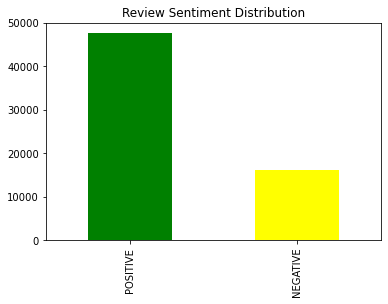

In [21]:
# Distribution of Target Variable - Review Sentiment
count_class=pd.value_counts(target['review_sentiment'], sort= True)
count_class.plot(kind= 'bar', color=["green", "yellow"])
plt.title('Review Sentiment Distribution')
plt.show()

In [22]:
#Calculate percentage of positive and negative reviews
print('POSITIVE', round(target['review_sentiment'].value_counts()['POSITIVE']/len(target) * 100), '%')
print('NEGATIVE', round(target['review_sentiment'].value_counts()['NEGATIVE']/len(target) * 100), '%')

POSITIVE 75 %
NEGATIVE 25 %


<font color="blue">Review Sentiment has an imbalance distribution, where "POSITIVE" reviews are thrice the "NEGATIVE" reviews
</font>

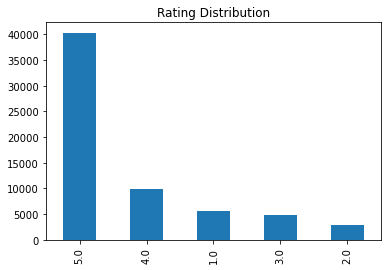

In [23]:
# Check distribution of Rating
count_rating=pd.value_counts(target['overall'], sort= True)
count_rating.plot(kind= 'bar')
plt.title('Rating Distribution')
plt.show()

In [24]:
# Creating a dataframe for Unique brand vs ASIN mapping and storing it in form of a dictionary

asin_brand_map = target.loc[:,['asin','brand']] 
asin_brand_map.drop_duplicates(inplace=True)
asin_brand_map_dict = dict(zip(asin_brand_map.asin, asin_brand_map.brand))

In [25]:
# Mapping brand names to the column 'also_view' in the new column 'also_view_brand'

target['also_view_brand'] = target['also_view'].apply(lambda x: [asin_brand_map_dict.get(i,'') for i in x])
target['also_view_brand'] = target['also_view_brand'].apply(lambda x: list(set(x)))

### Second Step: Text analytics

#### Text preprocessing

In [26]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('./stop_words_long.txt')]

# Reading other key words from a text file in to a list
remove_Keywords = [line.rstrip('\n') for line in open('./Remove_Keywords.txt')]

In [27]:
# Selecting relevant columns from Target file,Removing numbers from reviewText
main_text = target.loc[:,['reviewText','also_view_brand']]
main_text['reviewText'] = main_text['reviewText'].str.replace('\d+', '', regex=True)
main_text.head(150)

,reviewText,also_view_brand
0,This phone is ugly and heavy and has a terribl...,[]
1,I had the Samsung V and then I decided to try ...,[]
2,This is the first Samsung phone I have had and...,[]
3,"..and I'm from Europe, where the phones and ne...",[]
4,This phone is amazingly small and light for a ...,[]
...,...,...
145,I got this free with a year service plan w/Ve...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,..."
146,I thought to come write this review because it...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,..."
147,For a few years I have been with verizon .My l...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,..."
148,I do a lot of international traveling and want...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,..."


In [28]:
# Expanding Contractions in reviewText
main_text['reviewText_nocontrct'] = main_text['reviewText'].apply(lambda x: [contractions.fix(word) for word in x.split()])
main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light..."


In [29]:
# Converting all Characters to Lowercase
main_text['reviewText_lower'] = main_text['reviewText_nocontrct'].apply(lambda x: [word.lower() for word in x])
main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...","[this, phone, is, ugly, and, heavy, and, has, ..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...","[i, had, the, samsung, v, and, then, i, decide..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...","[this, is, the, first, samsung, phone, i, have..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","[..and, i am, from, europe,, where, the, phone..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...","[this, phone, is, amazingly, small, and, light..."


In [30]:
# Conversion to string
main_text['reviewText_lower'] = [' '.join(map(str, l)) for l in main_text['reviewText_lower']]

In [31]:
#Define function for removing special characters

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
def strip_punctuation(s):
    punc = set(string.punctuation)
    return ''.join(c for c in s if c not in punc)

main_text['reviewText_nopunc'] = main_text['reviewText_lower'].apply(remove_special_characters)
main_text['reviewText_nopunc'] = main_text['reviewText_nopunc'].apply(strip_punctuation)

main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...


In [32]:
# Tokenization
main_text['reviewText_tokenize'] = main_text['reviewText_nopunc'].apply(word_tokenize)
main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light..."


In [33]:
# Removing Stopwords
main_text['reviewText_clean'] = main_text['reviewText_tokenize'].apply(lambda x: [word for word in x if word not in stop_words])
main_text.head(50) 

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize,reviewText_clean
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ...","[phone, ugly, heavy, terrible, user, interface..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide...","[samsung, decided, try, fyi, people, battery, ..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have...","[samsung, phone, not, measureup, am, tmobile, ..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,...","[am, europe, phones, networks, better, samsung..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light...","[phone, amazingly, light, camera, phone, flash..."
5,The last year or so we have all seen an explos...,[],"[The, last, year, or, so, we, have, all, seen,...",the last year or so we have all seen an explos...,the last year or so we have all seen an explos...,"[the, last, year, or, so, we, have, all, seen,...","[seen, explosion, nice, color, phones, market,..."
6,I received my Treo last Friday from Treocentr...,[],"[I, received, my, Treo, last, Friday, from, Tr...",i received my treo last friday from treocentra...,i received my treo last friday from treocentra...,"[i, received, my, treo, last, friday, from, tr...","[received, treo, friday, treocentral, service,..."
7,"Had it for a year, my title for the review pre...",[],"[Had, it, for, a, year,, my, title, for, the, ...","had it for a year, my title for the review pre...",had it for a year my title for the review pret...,"[had, it, for, a, year, my, title, for, the, r...","[title, review, pretty, sums, phone, hopefully..."
8,I've been a Blackberry user for the last or ...,[],"[I have, been, a, Blackberry, user, for, the, ...",i have been a blackberry user for the last or ...,i have been a blackberry user for the last or ...,"[i, have, been, a, blackberry, user, for, the,...","[blackberry, user, email, day, consulting, bus..."
9,I have had to replace our office Treos --- in ...,[],"[I, have, had, to, replace, our, office, Treos...",i have had to replace our office treos --- in ...,i have had to replace our office treos in one...,"[i, have, had, to, replace, our, office, treos...","[replace, office, treos, times, twice, speaker..."


In [34]:
# Removing Keywords like Mobile names and some other random keywords
main_text['reviewText_clean'] = main_text['reviewText_clean'].apply(lambda x: [word for word in x if word not in remove_Keywords])
main_text.head(50) 

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize,reviewText_clean
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ...","[ugly, heavy, terrible, interface, techies, li..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide...","[decided, battery, problems, batteries, drain,..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have...","[not, measureup, customer, finally, fed, terri..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,...","[europe, networks, better, currently, best, so..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light...","[amazingly, light, camera, flashlightflash, pr..."
5,The last year or so we have all seen an explos...,[],"[The, last, year, or, so, we, have, all, seen,...",the last year or so we have all seen an explos...,the last year or so we have all seen an explos...,"[the, last, year, or, so, we, have, all, seen,...","[seen, explosion, nice, color, market, functio..."
6,I received my Treo last Friday from Treocentr...,[],"[I, received, my, Treo, last, Friday, from, Tr...",i received my treo last friday from treocentra...,i received my treo last friday from treocentra...,"[i, received, my, treo, last, friday, from, tr...","[received, treo, friday, treocentral, service,..."
7,"Had it for a year, my title for the review pre...",[],"[Had, it, for, a, year,, my, title, for, the, ...","had it for a year, my title for the review pre...",had it for a year my title for the review pret...,"[had, it, for, a, year, my, title, for, the, r...","[title, pretty, sums, hopefully, improves, sho..."
8,I've been a Blackberry user for the last or ...,[],"[I have, been, a, Blackberry, user, for, the, ...",i have been a blackberry user for the last or ...,i have been a blackberry user for the last or ...,"[i, have, been, a, blackberry, user, for, the,...","[email, day, consulting, business, proven, bul..."
9,I have had to replace our office Treos --- in ...,[],"[I, have, had, to, replace, our, office, Treos...",i have had to replace our office treos --- in ...,i have had to replace our office treos in one...,"[i, have, had, to, replace, our, office, treos...","[replace, office, treos, times, twice, speaker..."


In [35]:
# applying speech tags,i.e. noun, verb, adverb for each word.
main_text['reviewText_clean'] = main_text['reviewText_clean'].apply(nltk.tag.pos_tag)
main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize,reviewText_clean
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ...","[(ugly, RB), (heavy, JJ), (terrible, JJ), (int..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide...","[(decided, VBD), (battery, NN), (problems, NNS..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have...","[(not, RB), (measureup, VB), (customer, NN), (..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,...","[(europe, NN), (networks, NNS), (better, RBR),..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light...","[(amazingly, RB), (light, JJ), (camera, NN), (..."


In [36]:
# using NLTK’s word lemmatizer we will convert relevant speech tags to wordnet’s format. 
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
main_text['reviewText_clean'] = main_text['reviewText_clean'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize,reviewText_clean
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ...","[(ugly, r), (heavy, a), (terrible, a), (interf..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide...","[(decided, v), (battery, n), (problems, n), (b..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have...","[(not, r), (measureup, v), (customer, n), (fin..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,...","[(europe, n), (networks, n), (better, r), (cur..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light...","[(amazingly, r), (light, a), (camera, n), (fla..."


In [37]:
# Lemmitization
wnl = WordNetLemmatizer()
main_text['reviewText_clean'] = main_text['reviewText_clean'].apply(lambda x: [wnl.lemmatize(word,tag) for word,tag in x])
main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize,reviewText_clean
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ...","[ugly, heavy, terrible, interface, techie, lik..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide...","[decide, battery, problem, battery, drain, com..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have...","[not, measureup, customer, finally, feed, terr..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,...","[europe, network, well, currently, best, softw..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light...","[amazingly, light, camera, flashlightflash, pr..."


In [38]:
# Removing repeated words
main_text['reviewText_clean'] = main_text['reviewText_clean'].apply(lambda x: list(set(x)))
main_text.head()

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize,reviewText_clean
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ...","[terrible, moto, crazy, interface, good, call,..."
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide...","[save, whereas, lot, list, service, mm, good, ..."
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have...","[lack, quality, camera, terrible, technology, ..."
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,...","[best, light, look, network, intuitive, great,..."
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light...","[la, data, couldnt, see, service, stand, day, ..."


In [39]:
main_text['reviewText_final'] = [' '.join(map(str,l)) for l in main_text['reviewText_clean']]
main_text['also_view_clean'] = [' '.join(map(str,l)) for l in main_text['also_view_brand']]
main_text['also_view_clean'] = main_text['also_view_clean'].str.replace(',,', ',', regex=True)
main_text.head(150)

,reviewText,also_view_brand,reviewText_nocontrct,reviewText_lower,reviewText_nopunc,reviewText_tokenize,reviewText_clean,reviewText_final,also_view_clean
0,This phone is ugly and heavy and has a terribl...,[],"[This, phone, is, ugly, and, heavy, and, has, ...",this phone is ugly and heavy and has a terribl...,this phone is ugly and heavy and has a terribl...,"[this, phone, is, ugly, and, heavy, and, has, ...","[terrible, moto, crazy, interface, good, call,...",terrible moto crazy interface good call recept...,
1,I had the Samsung V and then I decided to try ...,[],"[I, had, the, Samsung, V, and, then, I, decide...",i had the samsung v and then i decided to try ...,i had the samsung v and then i decided to try ...,"[i, had, the, samsung, v, and, then, i, decide...","[save, whereas, lot, list, service, mm, good, ...",save whereas lot list service mm good decide f...,
2,This is the first Samsung phone I have had and...,[],"[This, is, the, first, Samsung, phone, I, have...",this is the first samsung phone i have had and...,this is the first samsung phone i have had and...,"[this, is, the, first, samsung, phone, i, have...","[lack, quality, camera, terrible, technology, ...",lack quality camera terrible technology not un...,
3,"..and I'm from Europe, where the phones and ne...",[],"[..and, I am, from, Europe,, where, the, phone...","..and i am from europe, where the phones and n...",and i am from europe where the phones and netw...,"[and, i, am, from, europe, where, the, phones,...","[best, light, look, network, intuitive, great,...",best light look network intuitive great recomm...,
4,This phone is amazingly small and light for a ...,[],"[This, phone, is, amazingly, small, and, light...",this phone is amazingly small and light for a ...,this phone is amazingly small and light for a ...,"[this, phone, is, amazingly, small, and, light...","[la, data, couldnt, see, service, stand, day, ...",la data couldnt see service stand day modem go...,
...,...,...,...,...,...,...,...,...,...
145,I got this free with a year service plan w/Ve...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,...","[I, got, this, free, with, a, year, service, p...",i got this free with a year service plan w/ver...,i got this free with a year service plan wveri...,"[i, got, this, free, with, a, year, service, p...","[camera, not, attractive, rating, website, pla...",camera not attractive rating website plan bite...,Motorola GreatCall Casio Pantech Nokia BlackB...
146,I thought to come write this review because it...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,...","[I, thought, to, come, write, this, review, be...",i thought to come write this review because it...,i thought to come write this review because it...,"[i, thought, to, come, write, this, review, be...","[not, anniversary, reason, genuine, replace, b...",not anniversary reason genuine replace broken ...,Motorola GreatCall Casio Pantech Nokia BlackB...
147,For a few years I have been with verizon .My l...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,...","[For, a, few, years, I, have, been, with, veri...",for a few years i have been with verizon .my l...,for a few years i have been with verizon my la...,"[for, a, few, years, i, have, been, with, veri...","[best, speed, razr, unlimited, disappointed, n...",best speed razr unlimited disappointed not pro...,Motorola GreatCall Casio Pantech Nokia BlackB...
148,I do a lot of international traveling and want...,"[, Motorola, GreatCall, Casio, Pantech, Nokia,...","[I, do, a, lot, of, international, traveling, ...",i do a lot of international traveling and want...,i do a lot of international traveling and want...,"[i, do, a, lot, of, international, traveling, ...","[standard, menu, quality, connect, sim, not, i...",standard menu quality connect sim not imagine ...,Motorola GreatCall Casio Pantech Nokia BlackB...


In [40]:
main_text_f = main_text.loc[:,['reviewText_final','also_view_clean']]
target_f = target.loc[:,['review_sentiment','overall','verified',
                         'asin','vote','Date&Time','title','brand','price']]

In [41]:
final = pd.concat([main_text_f,target_f],axis=1)
final.head()

,reviewText_final,also_view_clean,review_sentiment,overall,verified,asin,vote,Date&Time,title,brand,price
0,terrible moto crazy interface good call recept...,,NEGATIVE,1.0,False,B0000E3GWH,2.0,2004-09-20,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
1,save whereas lot list service mm good decide f...,,POSITIVE,4.0,False,B0000E3GWH,15.0,2004-07-23,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
2,lack quality camera terrible technology not un...,,NEGATIVE,3.0,False,B0000E3GWH,11.0,2004-07-05,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
3,best light look network intuitive great recomm...,,POSITIVE,5.0,True,B0000E3GWH,4.0,2004-04-11,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
4,la data couldnt see service stand day modem go...,,POSITIVE,3.0,False,B0000E3GWH,12.0,2004-02-18,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>


### Word Cloud for Positive Sentiment

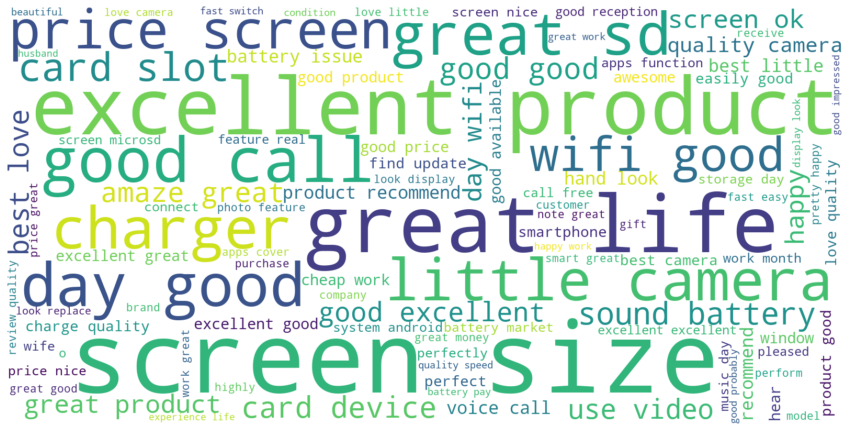

In [42]:
plt.figure(figsize = (15,15)) # Text that is recommended
wc = WordCloud(background_color = "white", width = 1600 , height = 800 , max_words = 100)
wc.generate(" ".join(final[final.review_sentiment == 'POSITIVE'].reviewText_final))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')

### Word Cloud for Negative Sentiment

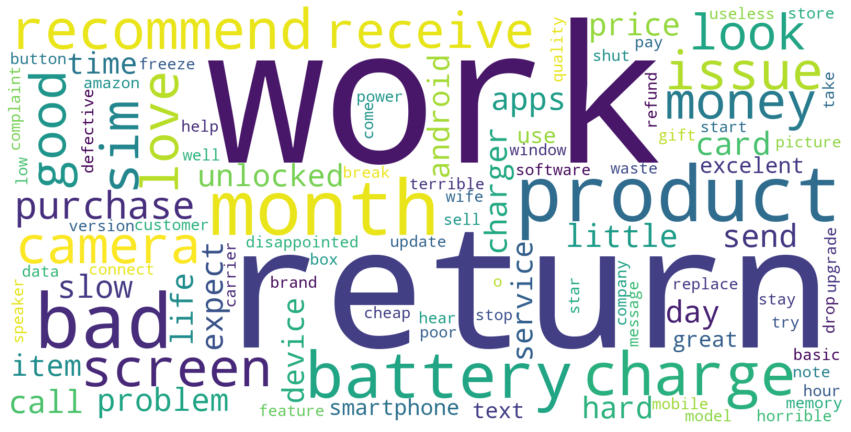

In [43]:
plt.figure(figsize = (15,15)) # Text that is recommended
wc = WordCloud(background_color = "white", width = 1600 , height = 800 , max_words = 100)
wc.generate(" ".join(final[final.review_sentiment == 'NEGATIVE'].reviewText_final))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')

In [44]:
# Based on word cloud for Positive and Negative Sentiment - 
# the keywords for Mobile features are selected and extracted for
# Data visualization 

# Reading stop words from a text file in to a list

Keywords_Mobile = [line.rstrip('\n') for line in open('./Keywords_Mobile.txt')]

main_text['reviewText'] = main_text['reviewText_clean'].apply(lambda x: [word for word in x if word in Keywords_Mobile])

main_text['reviewText'] = main_text['reviewText'].apply(lambda x: list(set(x)))

main_text['reviewText'] = [' '.join(map(str,l)) for l in main_text['reviewText']]

main_text_dv = main_text.loc[:,['reviewText','also_view_clean']]

final_dv = pd.concat([main_text_dv,target_f],axis=1)

In [45]:
final_dv.head()

,reviewText,also_view_clean,review_sentiment,overall,verified,asin,vote,Date&Time,title,brand,price
0,heavy,,NEGATIVE,1.0,False,B0000E3GWH,2.0,2004-09-20,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
1,charge light display camera button life antenn...,,POSITIVE,4.0,False,B0000E3GWH,15.0,2004-07-23,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
2,quality camera design processor antenna,,NEGATIVE,3.0,False,B0000E3GWH,11.0,2004-07-05,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
3,software light network,,POSITIVE,5.0,True,B0000E3GWH,4.0,2004-04-11,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>
4,charge light camera button weight charger life...,,POSITIVE,3.0,False,B0000E3GWH,12.0,2004-02-18,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,<NA>


In [46]:
final_dv.shape

(63838, 11)

## Data Visualisation

### Top 10 brands with the highest market share

In [47]:
# Defining funtion for calculating percent of Market Share per Brand
# and limitimg to values above 2% as brands below it need not bo analyized
# also the text would overlap otherwise
def label_function(val):
    return f'{val:.0f}%' if val > 2 else ''

# Defining funtion for limiting labels above 2% market share 
def get_new_labels(sizes, labels):
    new_labels = [label if size > 0.02 else '' for size, label in zip(sizes, labels)]
    return new_labels

In [48]:
# Making list of brands for labels
labels_pie = final_dv['brand'].value_counts(normalize=True).index.values
# Making list of percent values for labels
size_pie = final_dv['brand'].value_counts(normalize=True).to_list()

Text(0.5, 1.0, 'Market Share - Brand Wise')

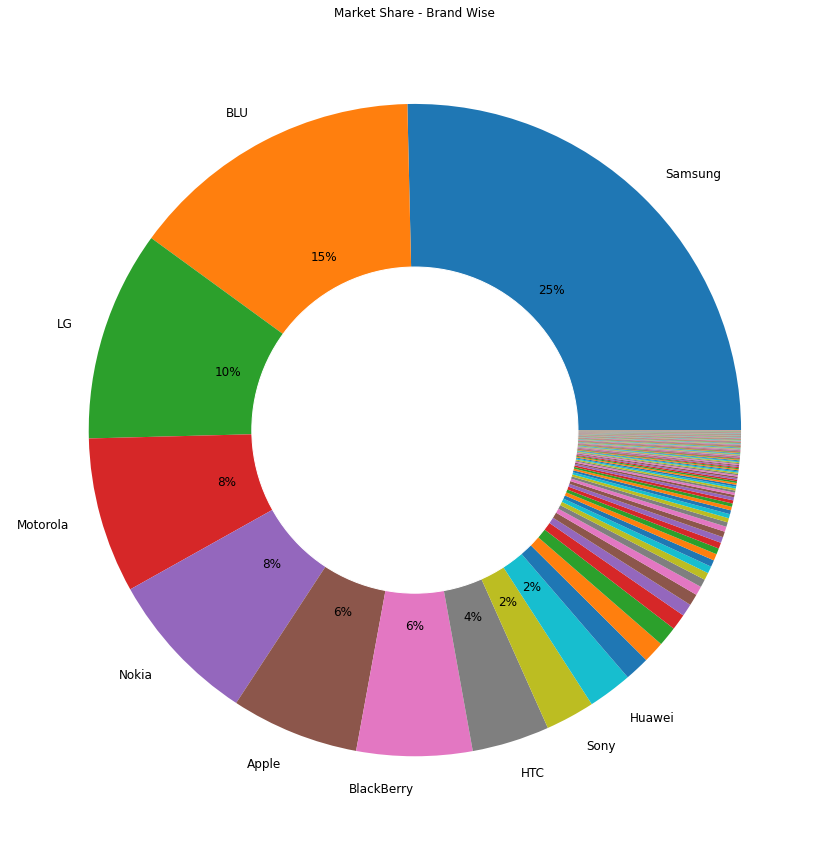

In [49]:
# Creating Pie chart of Market Share Brand wise
fig = final_dv['brand'].value_counts(normalize=True).plot(kind='pie',autopct=label_function,
                                                labels=get_new_labels(size_pie, labels_pie),
                                                labeldistance=1.1,
                                                textprops={'fontsize': 12},figsize=(15,15),ylabel='')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
fig.set_title("Market Share - Brand Wise")

- ‘Samsung’ is the mobile phone market leader with ~ 25% of the share.
- ‘BLU’ & ‘LG’ are the second and third leads with ~ 15% & 10% respectively of the share.
- Remaining is distributed majorly among the remaining brands – Motorola, Nokia, Apple, Blackberry, HTC, Sony & Huawei.

### Average Price for the brands

In [50]:
# Creating new dataframe - Price_Brand for visualisation
Price_Brand = final_dv[['brand', 'price']]
Price_Brand.dropna(axis=0,inplace=True) # dropping NA values
Price_Brand.head()

,brand,price
267,Motorola,17
268,Motorola,17
269,Motorola,17
270,Motorola,17
271,Motorola,17


In [51]:
# Calculating average price per brand
AvgPrice_byBrand = Price_Brand.groupby(['brand'])['price'].mean()
# Making a list of top 10 brands which have most sale
top_10_by_count = Price_Brand.value_counts('brand').nlargest(10)
# Converting panda series - AvgPrice_byBrand to dataframe
AvgPrice_byBrand = AvgPrice_byBrand.to_frame().reset_index()
# Making a dataframe of top 10 brands and their average prices
listOfAvgPrice = AvgPrice_byBrand[AvgPrice_byBrand['brand'].isin(top_10_by_count.index.to_list())]
listOfAvgPrice = listOfAvgPrice.sort_values('price')

In [52]:
# Making a list of top 10 brands and their average prices for labels
listOfBrandandAvgPrice = []
for i in listOfAvgPrice.iterrows():
    listOfBrandandAvgPrice.append(f"{i[1]['brand']}\n$ {i[1]['price']:.2f}")
listOfBrandandAvgPrice

['BlackBerry\n$ 45.27',
 'BLU\n$ 56.06',
 'Nokia\n$ 74.76',
 'Apple\n$ 79.68',
 'LG\n$ 81.25',
 'Motorola\n$ 92.18',
 'HTC\n$ 104.45',
 'Huawei\n$ 128.56',
 'Sony\n$ 133.01',
 'Samsung\n$ 133.26']

In [53]:
# Creating method for making Packed bubble chart
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

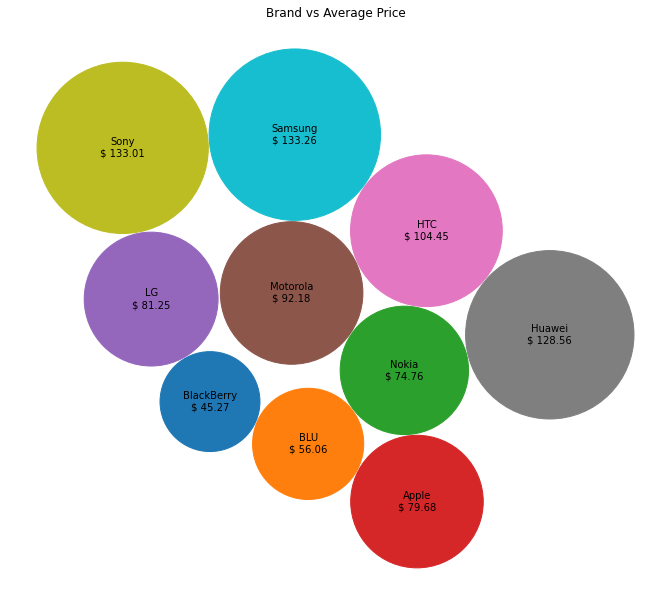

In [54]:
# Implementing the above method to make Packed Bubble chart 
brand_vs_avgPrice = {
    'Brand_AvgPrice': listOfBrandandAvgPrice,
    'AvgPrice': listOfAvgPrice['price'].to_list(),
    'color': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','#7f7f7f', '#bcbd22', '#17becf']
}

bubble_chart = BubbleChart(area=brand_vs_avgPrice['AvgPrice'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, brand_vs_avgPrice['Brand_AvgPrice'], brand_vs_avgPrice['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Brand vs Average Price')
fig.set_size_inches(18.5, 10.5)
plt.show()

- Samsung & Sony have the most expensive mobile phones followed by Huawei & HTC while Blackberry and BLU are the cheapest brands.
- HTC, Sony & Huawei have higher average price of mobiles with respect to their market share.
- BLU has cheaper phones and the second largest market share


### Brand Loyalty

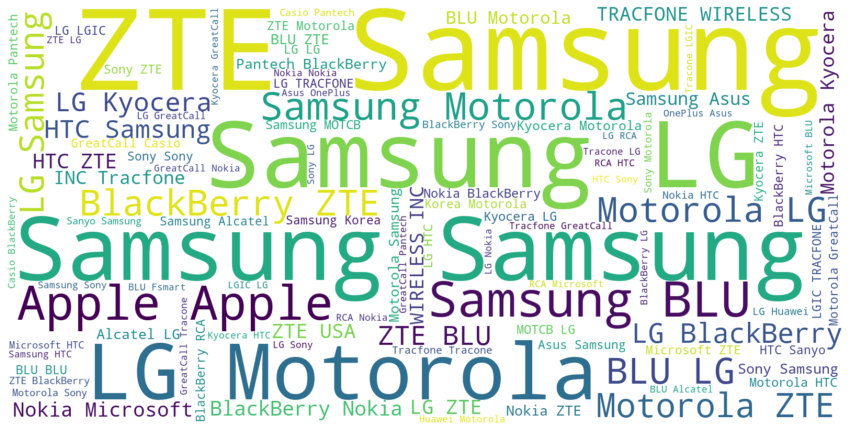

In [55]:
# Creating Word Cloud of the Most viewed Alternate Brand
plt.figure(figsize = (15,15)) # Text that is recommended
wc = WordCloud(background_color = "white", width = 1600 , height = 800 , max_words = 100)
wc.generate(" ".join(final_dv['also_view_clean']))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

- Customer preference in the brand remains same in both - alternate brand viewed and the brand purchased.
- Samsung is once again the highest viewed alternate brand when a mobile is purchased.
- ZTE is a new entrant in the top listers, followed by  LG, Motorola & BLU.


## Review Sentiment
### Review with Votes

In [56]:
# Creating new dataframe - review_df for visualisation
review_df = final_dv[['brand', 'review_sentiment']]

# Making a list of top 10 brand by the asin count
top_10_by_countOfAsin = review_df.value_counts('brand').nlargest(10)

# Filtering top 10 brands
dfOf_top10_asin = review_df[review_df['brand'].isin(top_10_by_countOfAsin.index.to_list())]

# Making a dataframe of the value counts of the asin
df_asin_valueCount = dfOf_top10_asin.value_counts().to_frame().reset_index()
df_asin_valueCount.rename(columns={0 :'Count of Asin'}, inplace=True )
df_asin_valueCount

,brand,review_sentiment,Count of Asin
0,Samsung,POSITIVE,12109
1,BLU,POSITIVE,6728
2,LG,POSITIVE,5063
3,Samsung,NEGATIVE,4086
4,Nokia,POSITIVE,3904
5,Motorola,POSITIVE,3742
6,Apple,POSITIVE,2963
7,BLU,NEGATIVE,2600
8,BlackBerry,POSITIVE,2418
9,HTC,POSITIVE,1934


<AxesSubplot:xlabel='brand', ylabel='Count of Asin'>

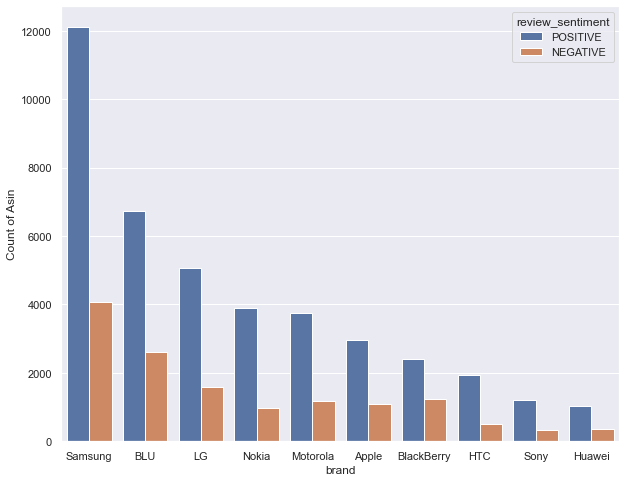

In [57]:
# Plotting bar graph to compare Count of Asin and the Brand and their review sentiment
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('brand','Count of Asin',hue= 'review_sentiment',data=df_asin_valueCount, ci= None)

### Brand vs Review Sentiments

In [142]:
# Creating new dataframe - review_df for visualisation
review_df_RS = final_dv[['brand', 'verified','review_sentiment']]
# # Getting verified reviews; removed false reviews
review_df_RS = review_df_RS[review_df_RS['verified']==True]
# Then dropping 'verified' column
del review_df_RS['verified']
review_df_RS

,brand,review_sentiment
3,Samsung,POSITIVE
5,Samsung,POSITIVE
8,,POSITIVE
13,,POSITIVE
28,Sanyo,POSITIVE
...,...,...
63832,Sony,POSITIVE
63833,Samsung,NEGATIVE
63834,Samsung,POSITIVE
63835,Samsung,POSITIVE


In [143]:
# making a list of top 10 brand by the asin count
top_10_by_countOfRS = review_df_RS.value_counts('brand').nlargest(10)
top_10_by_countOfRS

brand
Samsung       14019
BLU            8483
LG             5505
Motorola       4223
Nokia          3973
Apple          3842
BlackBerry     3206
HTC            1996
Sony           1307
Huawei         1189
dtype: int64

In [163]:
# Making a dataframe groupby of the top 10 brands
dfOf_top10_RS = review_df_RS[review_df_RS['brand'].isin(top_10_by_countOfRS.index.to_list())]
dfOf_top10_RS = dfOf_top10_RS.groupby(['brand', 'review_sentiment'])
dfOf_top10_RS.size()

brand       review_sentiment
Apple       NEGATIVE             1030
            POSITIVE             2812
BLU         NEGATIVE             2452
            POSITIVE             6031
BlackBerry  NEGATIVE             1158
            POSITIVE             2048
HTC         NEGATIVE              464
            POSITIVE             1532
Huawei      NEGATIVE              312
            POSITIVE              877
LG          NEGATIVE             1342
            POSITIVE             4163
Motorola    NEGATIVE             1035
            POSITIVE             3188
Nokia       NEGATIVE              848
            POSITIVE             3125
Samsung     NEGATIVE             3599
            POSITIVE            10420
Sony        NEGATIVE              284
            POSITIVE             1023
dtype: int64

In [165]:
# Making a dataframe of the value counts of the asin
# df_RS_valueCount = dfOf_top10_RS.value_counts('review_sentiment').to_frame().reset_index()
df_RS_valueCount = dfOf_top10_RS.size().to_frame().reset_index()
# Renaming the new column
df_RS_valueCount.rename(columns={0 :'Count of Review Sentiment'}, inplace=True )
df_RS_valueCount

,brand,review_sentiment,Count of Review Sentiment
0,Apple,NEGATIVE,1030
1,Apple,POSITIVE,2812
2,BLU,NEGATIVE,2452
3,BLU,POSITIVE,6031
4,BlackBerry,NEGATIVE,1158
5,BlackBerry,POSITIVE,2048
6,HTC,NEGATIVE,464
7,HTC,POSITIVE,1532
8,Huawei,NEGATIVE,312
9,Huawei,POSITIVE,877


<AxesSubplot:xlabel='brand', ylabel='Count of Review Sentiment'>

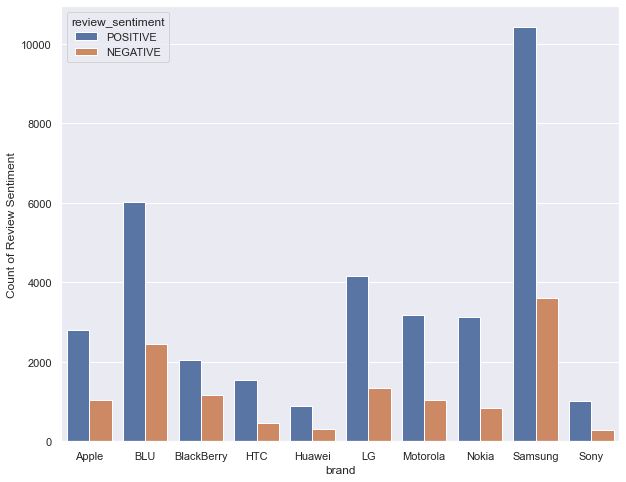

In [146]:
# Creating bar graph to compare Positive and Negative Count of review Sentiment for Brand 
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('brand','Count of Review Sentiment',hue= 'review_sentiment',data=df_RS_valueCount, ci= None)

- Samsung yet again leads in having the most favorable sentiments among both verified and unverified users.
- Reviews with upvotes also highlight Samsung on the top. 
- Surprisingly, Samsung has garnered more upvotes for Negative reviews than positive.


### Important phone characteristics Vs review sentiment

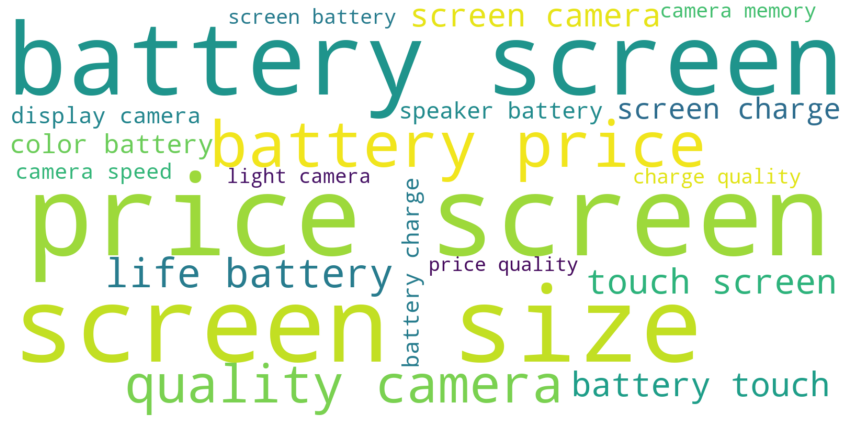

In [60]:
# Creating Word Cloud of the Most occuring word in all the reivews
plt.figure(figsize = (15,15)) 
wc = WordCloud(background_color = "white", width = 1600 , height = 800 , max_words = 20)
wc.generate(" ".join(final_dv['reviewText']))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

- ‘life / quality / battery / screen / price ’ are the most common keywords in review sentiment followed by features like - ‘memory / speed / charger’.
-  Physical attributes like ‘size/ camera/ design / power / light’ are found in substantial  number of reviews

### Creating TF-IDF (Term Frequency - Inverse Document Frequency)

In [61]:
# Let's take a subset of data (first 1000 rows only)
sub_final = main_text.iloc[0:5000,:]

In [62]:
# extract the messages from the dataframe
reviews = [reviewText_final for reviewText_final in sub_final.reviewText_final]
print(reviews)

['terrible moto crazy interface good call reception stay take heavy monster picture manhattan ugly clarity techie cheap like drop well', 'save whereas lot list service mm good decide flashlight picture completely calendar feature work rate flip white pic useful improve not gray annoy except game walk nuf button do bright frame lookin id person pretty crappy flash calculator drain sound bluishgreen battery sketch background memo worry little camera sometimes against sm light help antenna negative alarm building download serve press no life additional problem bluegreen zoom stuff color cool multishot charge java plan lit otherwise display look immensely voice ringtones external time enjoy black stay customer caller great furthermore sepia usual like bluetooth gadget', 'lack quality camera terrible technology not unlike ghz upgrade bad tinny handy except speakerphone simply receive maybe word look receiver design opinion antenna good call debate short external datebook alarm time practica

In [63]:
# TF IDF model
# Initialize TF-IDF vectorizer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(reviews)

In [64]:
# Print feature names
feature_names = vectorizer.get_feature_names()
print (feature_names)

['aac', 'aacmp', 'aacs', 'aarp', 'ab', 'abandon', 'abandoning', 'abandonned', 'abbreviate', 'abbreviation', 'abc', 'abd', 'abiertas', 'abierto', 'abilit', 'abilities', 'ability', 'abilitystamina', 'abit', 'aboard', 'abouse', 'aboutnokia', 'abreast', 'abreviated', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absoluted', 'absolutely', 'absolutes', 'absorb', 'absorbs', 'absoulty', 'absurd', 'absurdly', 'abundance', 'abundant', 'abuse', 'abused', 'abuser', 'abut', 'abvious', 'abysmal', 'ac', 'acabado', 'acabados', 'academic', 'acamera', 'accelerate', 'acceleration', 'accelerator', 'accelerometer', 'accent', 'accentuation', 'accenture', 'accept', 'acceptable', 'acceptably', 'accepted', 'acceptible', 'accepts', 'accesible', 'accesories', 'accesorios', 'access', 'accessable', 'accessibility', 'accessible', 'accessories', 'accessoriesfeatures', 'accessorizing', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'acclaim', 'acclimation', 'accommodate', 'accomodate',

In [65]:
# Let's look at the dataframe
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())
tfidf

,aac,aacmp,aacs,aarp,ab,abandon,abandoning,abandonned,abbreviate,abbreviation,...,zoolander,zoom,zoomable,zoomequipped,zooming,zroot,zune,zunes,zx,zybcom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.101694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# token names
print(vectorizer.get_feature_names())

['aac', 'aacmp', 'aacs', 'aarp', 'ab', 'abandon', 'abandoning', 'abandonned', 'abbreviate', 'abbreviation', 'abc', 'abd', 'abiertas', 'abierto', 'abilit', 'abilities', 'ability', 'abilitystamina', 'abit', 'aboard', 'abouse', 'aboutnokia', 'abreast', 'abreviated', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absoluted', 'absolutely', 'absolutes', 'absorb', 'absorbs', 'absoulty', 'absurd', 'absurdly', 'abundance', 'abundant', 'abuse', 'abused', 'abuser', 'abut', 'abvious', 'abysmal', 'ac', 'acabado', 'acabados', 'academic', 'acamera', 'accelerate', 'acceleration', 'accelerator', 'accelerometer', 'accent', 'accentuation', 'accenture', 'accept', 'acceptable', 'acceptably', 'accepted', 'acceptible', 'accepts', 'accesible', 'accesories', 'accesorios', 'access', 'accessable', 'accessibility', 'accessible', 'accessories', 'accessoriesfeatures', 'accessorizing', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'acclaim', 'acclimation', 'accommodate', 'accomodate',

### Final Step: Build a sentiment classification system

In [67]:
# Mapping required fields in a new Dataframe
data = final.loc[:,['reviewText_final','overall']]

In [68]:
# Manually tagging data as positive or negative based on the rating column 'overall'
data_positive=data[data['overall'].isin([4,5])]
data_negative=data[data['overall'].isin([1,2])]

In [69]:
# Taking sub set of data
processed_data=pd.concat([data_positive[:5000],data_negative[:5000]])

In [70]:
# Mapping labels to 0 and 1
processed_data['label']=1
processed_data['label'][data['overall'].isin([1,2])]= 0

In [71]:
# convert to X and y
X = processed_data.reviewText_final
y = processed_data.label
print(X.shape)
print(y.shape)

(10000,)
(10000,)


In [72]:
# Split Train & Test Data
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [73]:
# Initialize TF-IDF vectorizer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

In [74]:
tfidf_vectorizer.fit(X_train)

TfidfVectorizer(stop_words='english')

In [75]:
# transforming the train and test datasets
X_train_transformed = tfidf_vectorizer.transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

In [76]:
X_train_transformed


<7500x16295 sparse matrix of type '<class 'numpy.float64'>'
	with 191638 stored elements in Compressed Sparse Row format>

#### Use KNN algorithm 

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, parameters, cv=10)
model.fit(X_train_transformed, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [78]:
model.best_params_

{'n_neighbors': 4}

In [79]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=4)

In [80]:
y_pred_knn = knn_classifier.predict(X_test_transformed)

In [81]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy")
print(accuracy_score(y_test, y_pred_knn))
print("Classification Score")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix
[[658 582]
 [378 882]]
Accuracy
0.616
Classification Score
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1240
           1       0.60      0.70      0.65      1260

    accuracy                           0.62      2500
   macro avg       0.62      0.62      0.61      2500
weighted avg       0.62      0.62      0.61      2500



<AxesSubplot:>

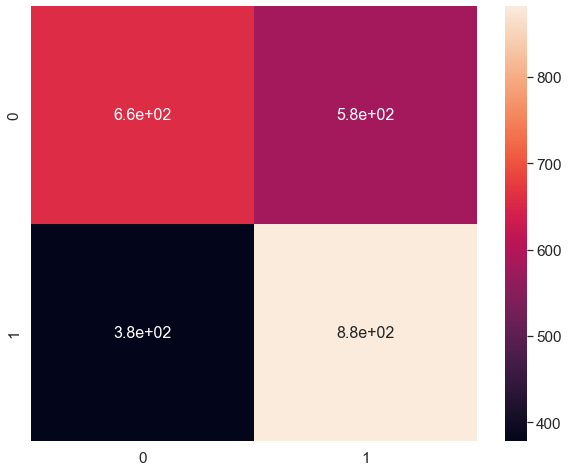

In [82]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_knn)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

<font color="blue">From the above confusion matrix and accuracy we can observe that accuracy is around 62% which is very less.
So we must try some other algorithm as well </font>

#### Naïve Bayes

In [83]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_nb = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [84]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_nb)

0.8584

In [85]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_nb)
# help(metrics.confusion_matrix)

array([[1125,  115],
       [ 239, 1021]])

In [86]:
confusion = metrics.confusion_matrix(y_test, y_pred_nb)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1125  115]
 [ 239 1021]]


In [87]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8103174603174603


In [88]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.907258064516129


In [89]:
precision = TP / float(TP + FP)
print("precision",precision)

precision 0.8987676056338029


In [90]:
print("Precision: ",  precision)
print("PRECISION SCORE: ",metrics.precision_score(y_test, y_pred_nb))
print("RECALL SCORE: ", metrics.recall_score(y_test, y_pred_nb))
print("F1 SCORE: ",metrics.f1_score(y_test, y_pred_nb))

Precision:  0.8987676056338029
PRECISION SCORE:  0.8987676056338029
RECALL SCORE:  0.8103174603174603
F1 SCORE:  0.8522537562604342


<font color="blue">
The performance of the Naive Bayes model is evaluated based on its Precision, Recall, and F1 score. Precision refers to the proportion of correctly predicted positive instances out of all positive predictions. In this case, the Precision score is 0.8987676056338029, which means that out of all the positive predictions made by the model, 89.88% were correct.

Recall, on the other hand, measures the proportion of correctly predicted positive instances out of all actual positive instances. The Recall score for this model is 0.8103174603174603, indicating that the model was able to identify 81.03% of all actual positive instances.

The F1 score is the harmonic mean of Precision and Recall and provides a more balanced measure of the model's performance. The F1 score in this case is 0.8522537562604342, which suggests that the Naive Bayes model is reasonably accurate in predicting positive instances.

Overall, these evaluation metrics indicate that the model performs reasonably well in predicting positive instances, with high precision and reasonable recall. 
</font>

In [91]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9390479390681004


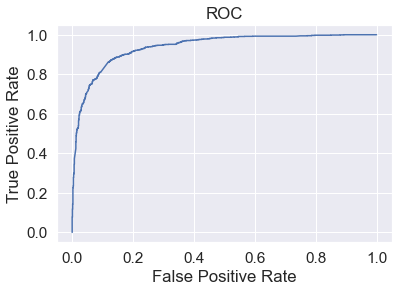

In [92]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

<font color="blue"> The ROC shows the curve closer to the top-left corner which is indicative that the model is decent performer.</font>

### To sum up the Key Insights and Recommendations are :
   - Top 10 brands with the highest market share
       - ‘Samsung’ is the mobile phone market leader with ~ 25% of the share.
       - ‘BLU’ & ‘LG’ are the second and third leads with ~ 15% and 10% respectively
       - Remaining is distributed majorly among the remaining brands – Motorola, Nokia, Apple, Blackberry, HTC, Sony & Huawei.
   - Average Price for the Brands 
       - Samsung & Sony have the most expensive mobile phones followed by Huawei & HTC while Blackberry and BLU are the cheapest brands.
       - HTC, Sony & Huawei have higher average price of mobiles with respect to their market share.
       - BLU has cheaper phones and the second largest market share
   - Brand Loyalty 
       - Customer preference in the brand remains same in both - alternate brand viewed and the brand purchased.
       - Samsung is once again the highest viewed alternate brand when a mobile is purchased.
       - ZTE is a new entrant in the top listers, followed by  LG, Motorola & BLU.
   - Review Sentiment 
       - Samsung yet again leads in having the most favorable sentiments among both verified and unverified users.
       - Reviews with upvotes also highlight Samsung on the top.
       - Surprisingly, Samsung has garnered more upvotes for Negative reviews than positive.
   - Important phone characteristics Vs review sentiment 
       - Screen, Battery, Life, Quality Are the most common keywords in review sentiment followed by features like processor, charger and design.
       - While price is mentioned several times, keywords like speed, size and memory were also cited.

### Conclusion
- To sum up, we have efficiently created a Naive Baye's algorithm to predict the sentiment of a particaular review 
- We performed exploratory data analysis on the dataset, pre-processed it, and built the required model.
- Furthermore, we analyzed the sentiments towards the features and gave some business recommendations which can be used for improving the business.